### Group Project: Analyzing Customer Churn in the Telecommunication Industry

In [1]:
# Import all the necessary libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Import warnings and set filter warnings to ignore due to the use of deprecated code  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data source: https://www.kaggle.com/datasets/vikramamin/customer-churn-decision-tree-and-random-forest

# Load the dataset
df = pd.read_csv('Customer-Churn.csv')

In [3]:
# Show information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
# Display the first few rows of the DataFrame to get a preview of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


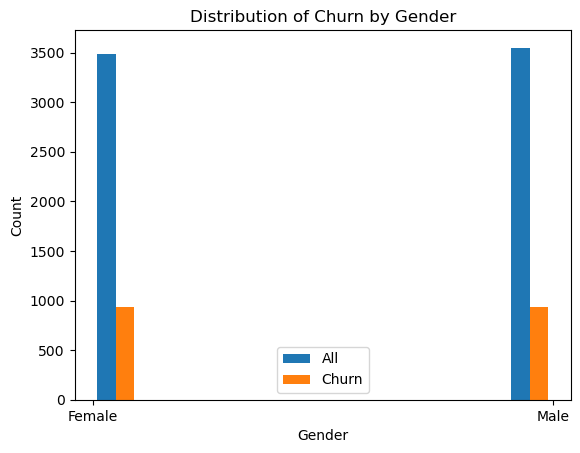

In [5]:
# Limit to churn customers
churn_customers = df[df['Churn'] == 'Yes']

# Specify the column name for the variable I want to create a histogram for
column_name = 'gender'

# Plot the histogram
plt.hist([df[column_name],churn_customers[column_name]],label=['All','Churn'])

# Add a title and labels for the x and y axes
plt.title('Distribution of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.legend()

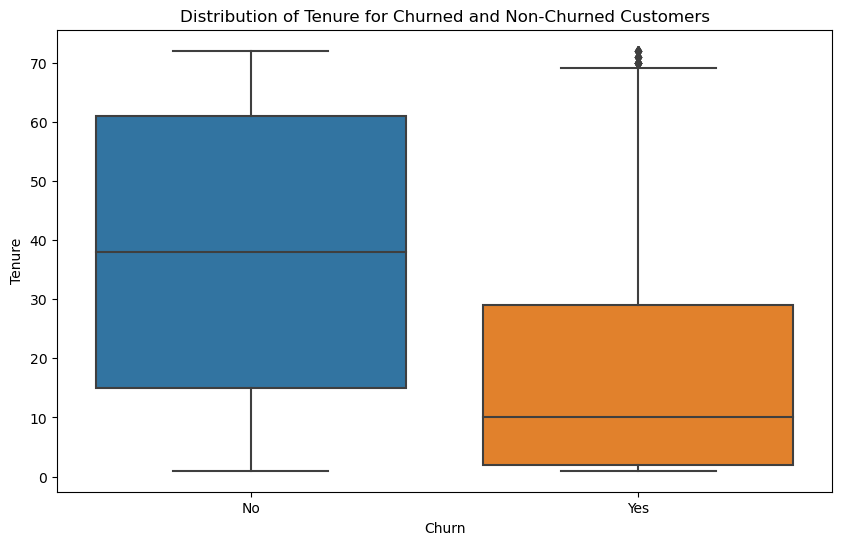

In [6]:
# Boxplot - Comparison of numerical variables for churned and non-churned customers

# Set the size of the figure
plt.figure(figsize=(10, 6))

# x='Churn': Specify the variable for the x-axis (Churned or Non-Churned)
# y='tenure': Specify the variable for the y-axis (Tenure)
# data=df: Specify the dataframe 'df' from which the data will be plotted
sns.boxplot(x='Churn', y='tenure', data=df)

# Set the labels for the x-axis and y-axis
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Set the title for the boxplot
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')

# Display the boxplot
plt.show()

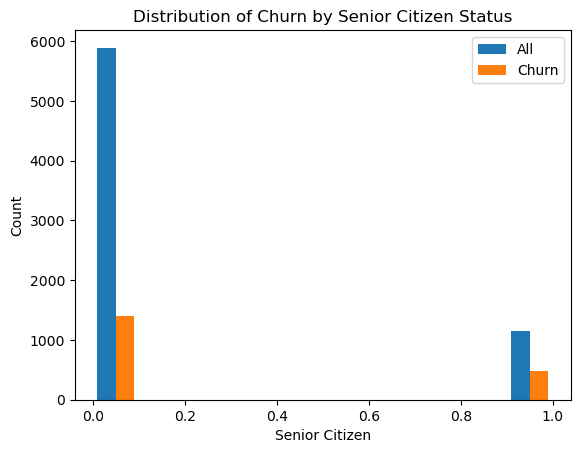

In [7]:
# Limit to churn customers
churn_customers = df[df['Churn'] == 'Yes']

# Specify the column name for the variable I want to create a histogram for
column_name = 'SeniorCitizen'

# Plot the histogram
plt.hist([df[column_name],churn_customers[column_name]],label=['All','Churn'])

# Add a title and labels for the x and y axes
plt.title('Distribution of Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend() # Add a legend to the plot

# Show the plot
plt.show()

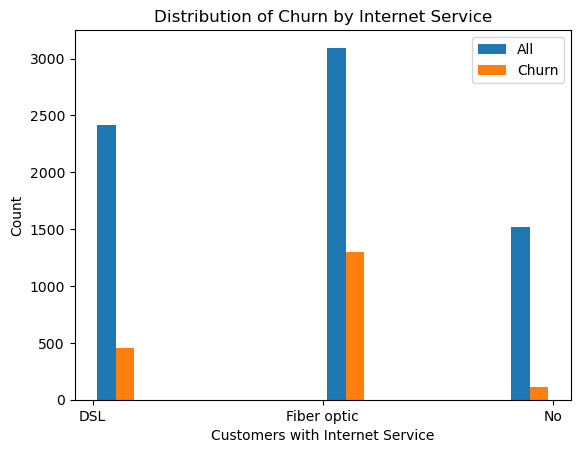

In [8]:
# Limit to churn customers
churn_customers = df[df['Churn'] == 'Yes']

# Specify the column name for the variable I want to create a histogram for
column_name = 'InternetService'

# Plot the histogram
plt.hist([df[column_name],churn_customers[column_name]],label=['All','Churn'])

# Add a title and labels for the x and y axes
plt.title('Distribution of Churn by Internet Service')
plt.xlabel('Customers with Internet Service')
plt.ylabel('Count')
plt.legend() # Add a legend to the plot

# Show the plot
plt.show()

In [9]:
# Turn Partner into binary column
values_to_replace = ['Yes', 'No']
values_to_replace_with = [1, 0]
df['Partner'].replace(values_to_replace, values_to_replace_with, inplace=True)

# Turn Dependents into binary column
values_to_replace = ['Yes', 'No']
values_to_replace_with = [1, 0]
df['Dependents'].replace(values_to_replace, values_to_replace_with, inplace=True)

# Turn PhoneService into binary column
values_to_replace = ['Yes', 'No']
values_to_replace_with = [1, 0]
df['PhoneService'].replace(values_to_replace, values_to_replace_with, inplace=True)

# Turn MultipleLines into binary column
values_to_replace = ['Yes', 'No', 'No phone service']
values_to_replace_with = [1, 1, 0]
df['MultipleLines'].replace(values_to_replace, values_to_replace_with, inplace=True)

# Turn Churn into binary column
values_to_replace = ['Yes', 'No']
values_to_replace_with = [1, 0]
df['Churn'].replace(values_to_replace, values_to_replace_with, inplace=True)

# Turn PaperlessBilling into binary column
values_to_replace = ['Yes', 'No']
values_to_replace_with = [1, 0]
df['PaperlessBilling'].replace(values_to_replace, values_to_replace_with, inplace=True)

In [10]:
# Create InternetServiceType value and translate values from InternetService column
df.insert(9, 'InternetServiceType', '')
df.loc[df['InternetService'] == 'No', 'InternetServiceType'] = 'None'
df.loc[df['InternetService'] == 'DSL', 'InternetServiceType'] = 'DSL'
df.loc[df['InternetService'] == 'Fiber optic', 'InternetServiceType'] = 'Fiber optic'

# Turn InternetService into binary column
values_to_replace = ['DSL', 'Fiber optic', 'No']
values_to_replace_with = [1, 1, 0]
df['InternetService'].replace(values_to_replace, values_to_replace_with, inplace=True)


# Additional Internet Services:

# Set up matrix of replacements
values_to_replace = ['No', 'Yes', 'No internet service']
values_to_replace_with = [0, 1, 0]
values_for_columns = {'OnlineSecurity': values_to_replace, 'OnlineBackup': values_to_replace, 
                      'DeviceProtection': values_to_replace, 'TechSupport': values_to_replace, 
                      'StreamingTV': values_to_replace, 'StreamingMovies': values_to_replace}

# Replace the values in the specified columns with the appropriate values per the matrix above
df.replace({k: dict(zip(values_for_columns[k], values_to_replace_with)) for k in values_for_columns}, inplace=True)

In [11]:
# Replace Contract with dummies
df = pd.get_dummies(df, columns=['Contract'], prefix='Contract')

# Replace PaymentMethod with dummies
df = pd.get_dummies(df, columns=['PaymentMethod'], prefix='PaymentMethod')

# Replace InternetServiceType with dummies
df = pd.get_dummies(df, columns=['InternetServiceType'], prefix='InternetServiceType')

In [12]:
# Drop unneeded columns
df.drop(['customerID', 'gender', 'InternetServiceType_None'], axis=1, inplace=True)

In [13]:
# Save new file back to storage
df.to_csv("ChurnData_transform.csv", index=False)

In [14]:
# Display the dataset in its final cleaned and transformed state
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetServiceType_DSL,InternetServiceType_Fiber optic
0,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,34,1,1,1,1,0,1,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,2,1,1,1,1,1,0,...,1,1,0,0,0,0,0,1,1,0
3,0,0,0,45,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,2,1,1,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1


In [15]:
# Split the data into training and test sets
X = df.drop(columns=["Churn"])  # Features (input data)
y = df["Churn"]  # Target variable (output labels)

# test_size: Proportion of the dataset to include in the test split (20% in this case)
# random_state: Seed for reproducibility, ensuring the same random split each time for consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Calculate the predicted values using the logistic regression model on the test data
y_pred_logistic = logistic_model.predict(X_test)

In [18]:
# Calculate the accuracy of the logistic regression classifier
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.2f}")

# Generate and print the classification report for the logistic regression classifier
classification_report_result_logistic = classification_report(y_test, y_pred_logistic)
print("Classification Report:\n", classification_report_result_logistic)

# Generate and print the confusion matrix for the logistic regression classifier
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[918 115]
 [181 193]]


<Axes: ylabel='Feature'>

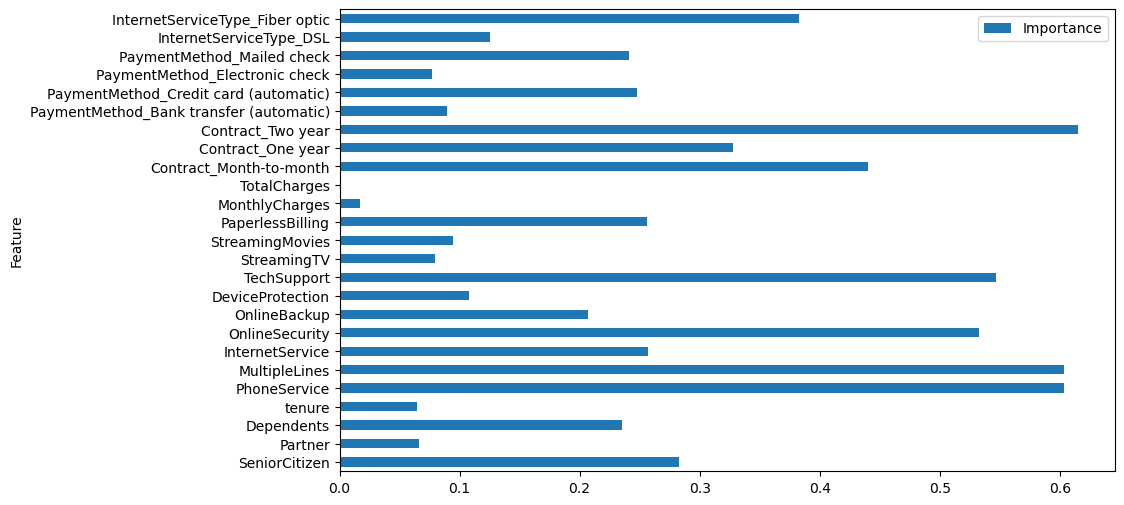

In [19]:
# Show Predictions: The below shows a more detailed graph than the Random Forest Classifier

# Feature Importance
# Get the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding absolute coefficients as feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})

# Create a horizontal bar chart to visualize the feature importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [20]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict on the test set
y_pred_forest = rf_classifier.predict(X_test)

In [22]:
# Calculate the accuracy of the Random Forest classifier
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy_forest:.2f}")

# Generate and print the classification report for the Random Forest classifier
classification_report_result_forest = classification_report(y_test, y_pred_forest)
print("Classification Report:\n", classification_report_result_forest)

# Generate and print the confusion matrix for the Random Forest classifier
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix:\n", conf_matrix_forest)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:
 [[927 106]
 [195 179]]


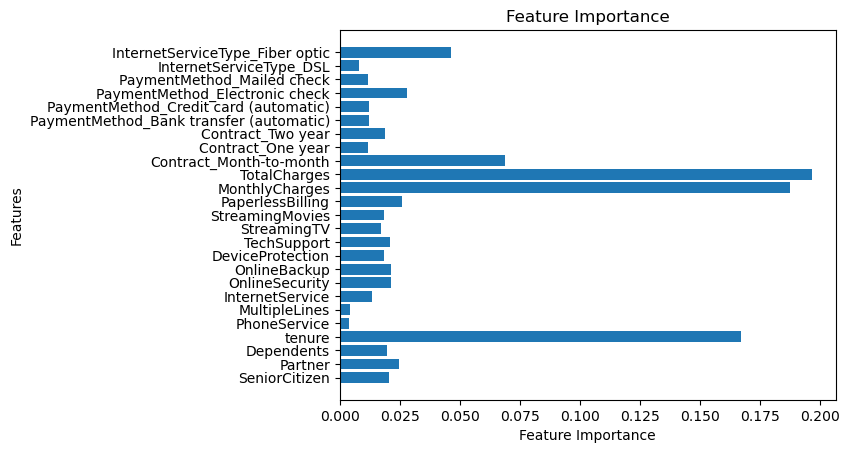

In [23]:
# Show Predictions

# Feature Importance
# Get the feature importance values from the RandomForestClassifier model
feature_importance = rf_classifier.feature_importances_

# Create a horizontal bar chart to visualize feature importance
plt.barh(X.columns, feature_importance)

# Add labels and title to the plot
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Display the plot
plt.show()